# MNIST

### MNIST는 이미지를 학습하고  prediction하는 예제

- 28*28 크기의 이미지가 주어진다.
- 28*28 = 784칸
- 한 사람이 0부터 9까지 숫자를 쓴 것 이 한 열 * 55000명 

- tensorflow에서 제공하는 MNIST예제를 이용해서 조금 편하게 작업해보자!



In [4]:
# 필요한 module import 

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data  # mnist에 대한 패키지 중 input_data라는 module 설치


# Data Loading
mnist = input_data.read_data_sets("./data/mnist",one_hot = True)  # read_data_sets: 데이터셋 읽어들이는 함수
# 압축파일 다운받아서 특정 폴더에 담아야 한다.
# mnist폴더 하나 만들고 실행시키면 압축파일 4개 저장됨
# one_hot = True: one_hot 처리가 되어서 저장-> keggle같은데는 one hot encoding도 직접 해야 하지만 여기서는 해서 제공해줌



Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [6]:
#mnist.train     # mnist가 가지고 있는 train data
#mnist.train.images      # 학습용 x데이터
#mnist.train.images.shape     # (55000, 784)
## numpy 2차원 배열 가지고 data frame 만들어보자.
train_x_data_df = pd.DataFrame(mnist.train.images)
train_x_data_df.to_csv("./mnist_x_data.csv", index=False)   # 이거 하고나면 python_DA에 파일 생성됨
# x 데이터의 각 픽셀값은 0에서 1사이 값으로 이미 scale되어있음 (0이 흰색)
# 원래 이미지 데이터는 rgb alpha값으로 3차원 데이터로 되어있음
# 0이 흰색. 1과 가까울수록 색상이 어두워짐

train_y_data_df = pd.DataFrame(mnist.train.labels)
train_y_data_df.to_csv("./mnist_y_data.csv", index=False)


In [28]:
# Tensorflow로 machine learning
# placeholder
X = tf.placeholder(shape=[None,784],dtype=tf.float32)
Y = tf.placeholder(shape=[None,10],dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([784,10]),name="weight")
b = tf.Variable(tf.random_normal([10]),name="bias")

# Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())



In [29]:
# 학습
train_epoch = 30  # 전체를 30번 할거다 (100개씩 잘라서 전체 도는거를 30번 하겠다.)
batch_size = 100 # 한번에 몇개를 학습할거니? 일반적으로 100개씩 하면 적당함

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)    # 원래 우리가 next_batch같은거 구현해야 하는데 예제라 다 제공해줌
        
        _, cost_val = sess.run([train,cost],
                              feed_dict={X:batch_x,
                                        Y:batch_y})
    if step%3==0:
        print("Cost값은:{}".format(cost_val))

        
# 학습이 종료되었으니 정확도를 측정하자! 
predict = tf.argmax(H,axis=1)
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도는:{}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                    Y:mnist.test.labels})))


Cost값은:1.3305743932724
Cost값은:0.8202651143074036
Cost값은:0.39574524760246277
Cost값은:0.4273393750190735
Cost값은:0.39594703912734985
Cost값은:0.3535887897014618
Cost값은:0.40979278087615967
Cost값은:0.4303171634674072
Cost값은:0.420546293258667
Cost값은:0.36775627732276917
정확도는:0.8980000019073486


Label:[4]
Predict:[4]


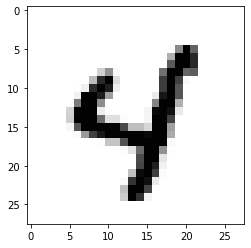

In [162]:
# Prediction 
# 랜덤으로 하나의 데이터를 추출하여 그것을 이용해서 prediction을 한 후 결과를 비교해보자 

r = np.random.randint(0,mnist.test.num_examples)   # mnist.test.num_examples = 10000  
                                                    # 랜덤으로 한 행 가져오기 위해 행번호 랜덤으로 추출
# 난수가 의미하는 행의 label값을 먼저 구해보자.
#mnist.test.labels[r]    # 해당 label  
# sess.run(tf.argmax(mnist.test.labels[r], axis=0))  # 1차원 데이터이므로 axis는 0밖에 못씀
# sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))  # labels[r:r+1] : 위와 똑같은 값을 가져오지만, 2차원으로 가져옴 (위에거 써도 똑같음)
print("Label:{}".format(sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))))

print("Predict:{}".format(sess.run(tf.argmax(H,1), 
         feed_dict = {X:mnist.test.images[r:r+1]})))  # X값은 2차원이 들어가야 함 (그냥 r쓰면 type 안맞음)

plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="Greys")  # cmap: 컬러맵

